In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import plotting
%matplotlib inline
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import cross_val_score
import os

In [6]:
df = pd.read_csv('bank.csv')

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
#Lets see the overview of the dataset means average, std, min , max of the data
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


# Data Cleaning

In [11]:
# Checking Missing values or null entries in the dataset
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [12]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [13]:
df.shape

(11162, 17)

# Exploratory data analysis

<AxesSubplot:xlabel='deposit', ylabel='count'>

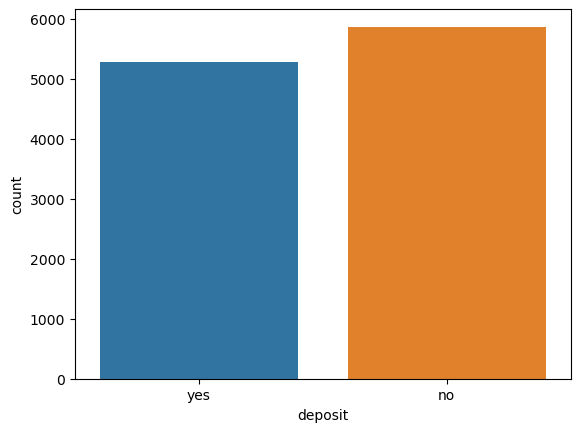

In [14]:
sns.countplot(x='deposit',data=df)

<AxesSubplot:xlabel='deposit', ylabel='count'>

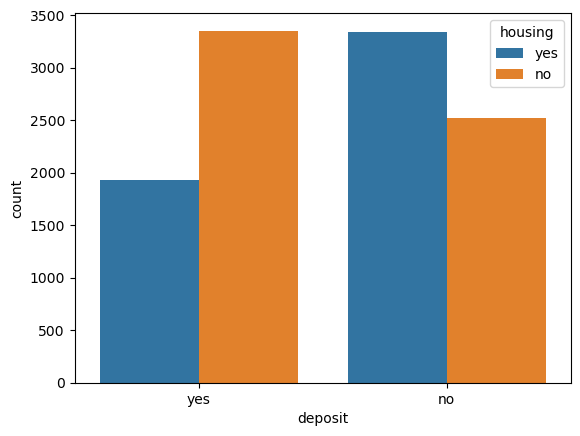

In [15]:
sns.countplot(x='deposit',hue='housing',data=df)

<AxesSubplot:xlabel='deposit', ylabel='count'>

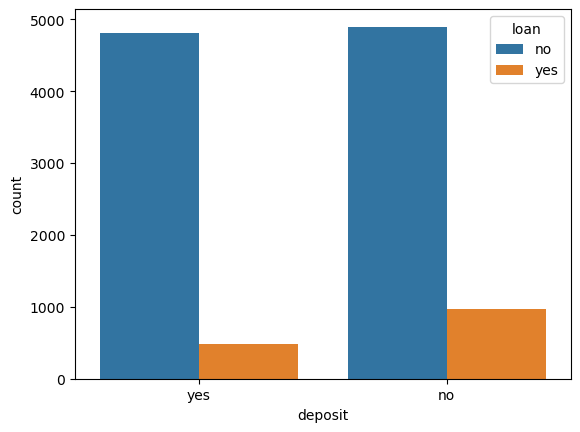

In [16]:
sns.countplot(x='deposit',hue='loan',data=df)

In [17]:
# making boolean series for term deposit subscribed customers of bank
filter1 = df["deposit"]=="yes"

In [18]:
# filtering data on basis of both filters 
df_subscribed = df.where(filter1).dropna()

In [19]:
df_subscribed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,-1.0,0.0,unknown,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,-1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,-1.0,0.0,unknown,yes


<AxesSubplot:xlabel='deposit', ylabel='count'>

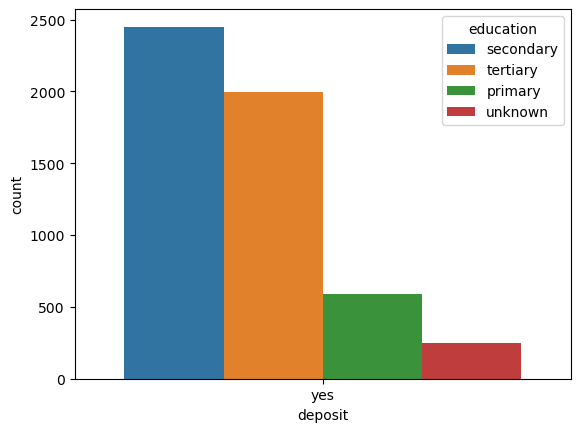

In [20]:
sns.countplot(x='deposit', hue='education',data=df_subscribed)

<AxesSubplot:xlabel='deposit', ylabel='count'>

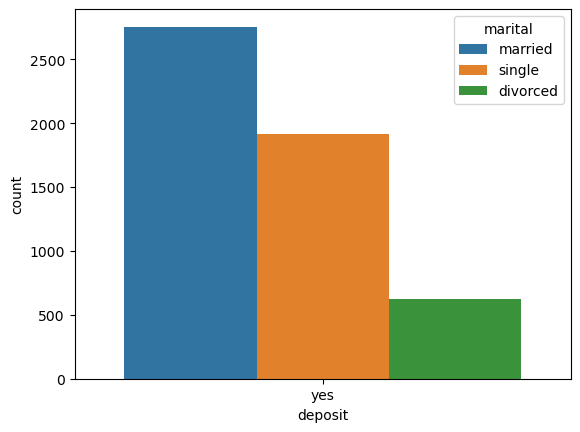

In [21]:
sns.countplot(x='deposit',hue='marital',data=df_subscribed)

# Pairplot of Numerical features

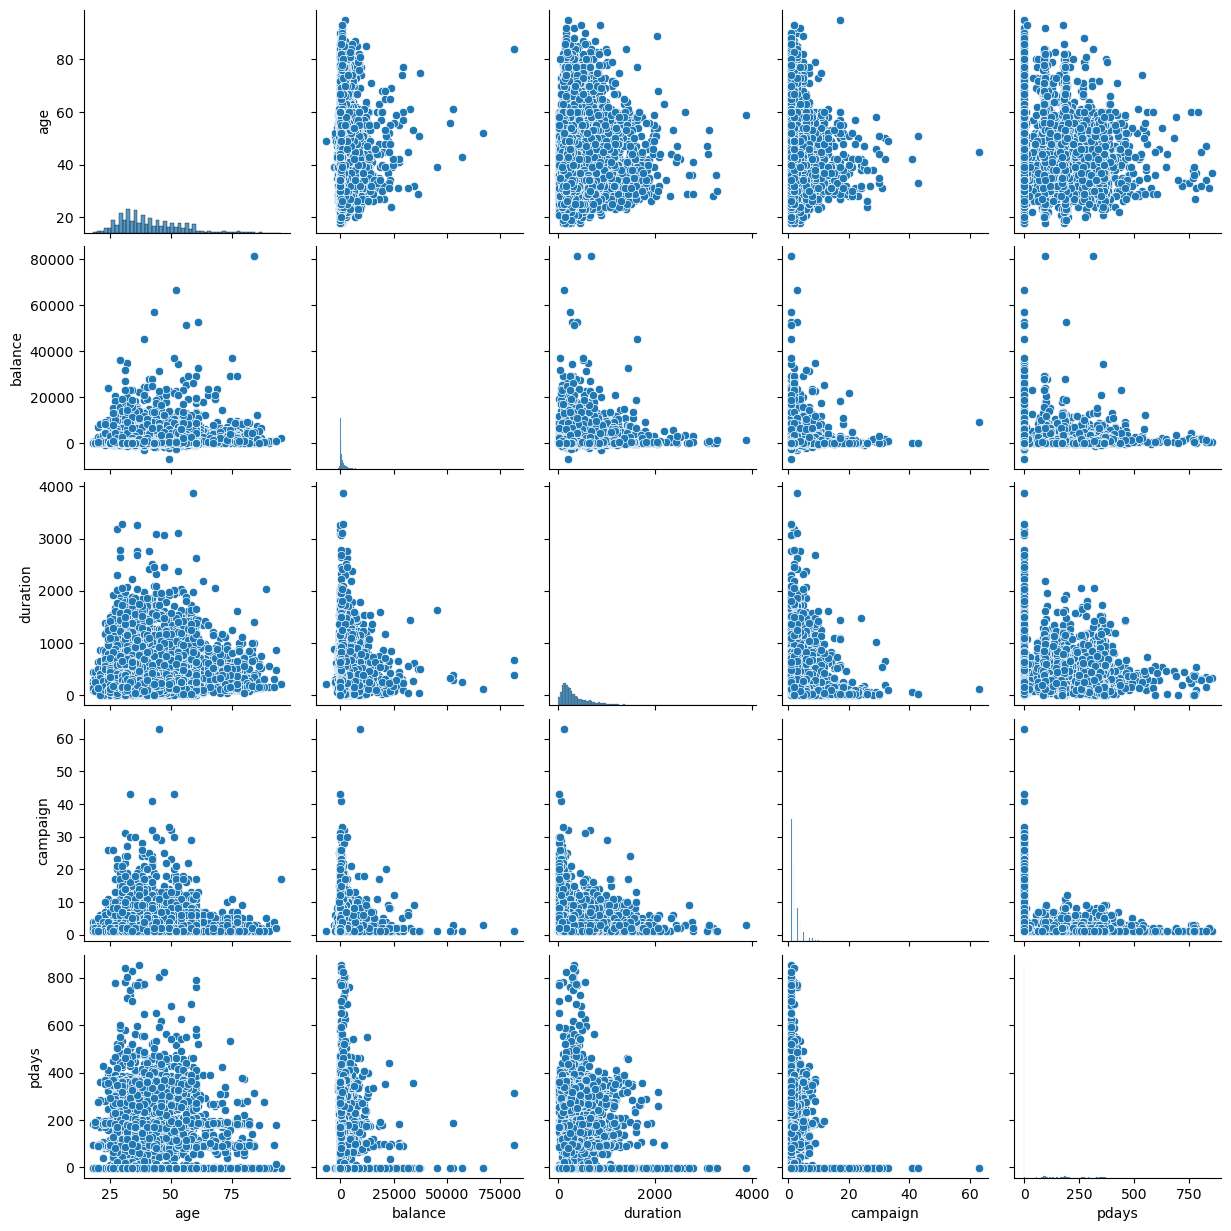

In [22]:
dataset2=df[['age','balance','duration','campaign','pdays']]

sns.pairplot(dataset2)
plt.show()

# Distribution of Age

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


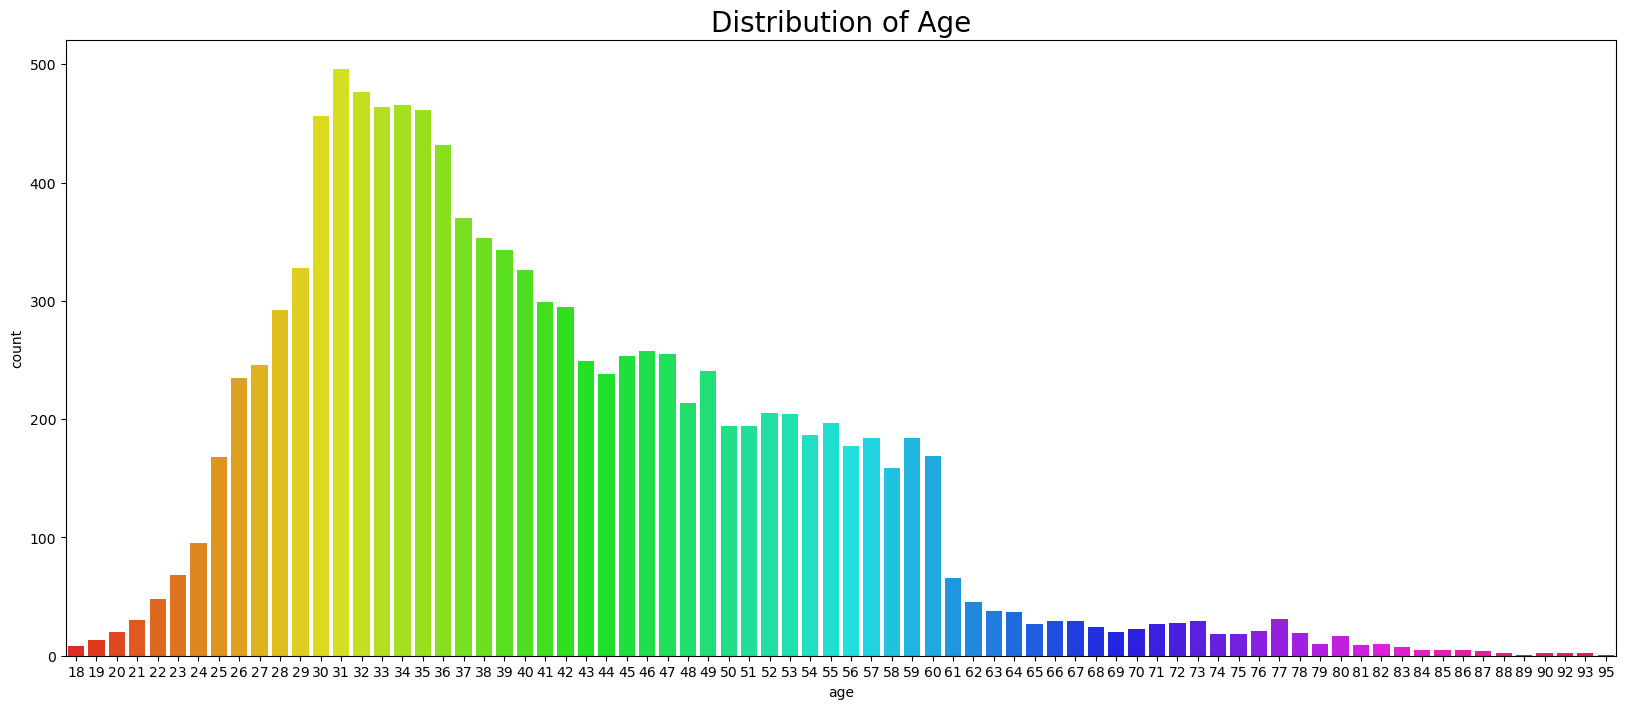

In [23]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


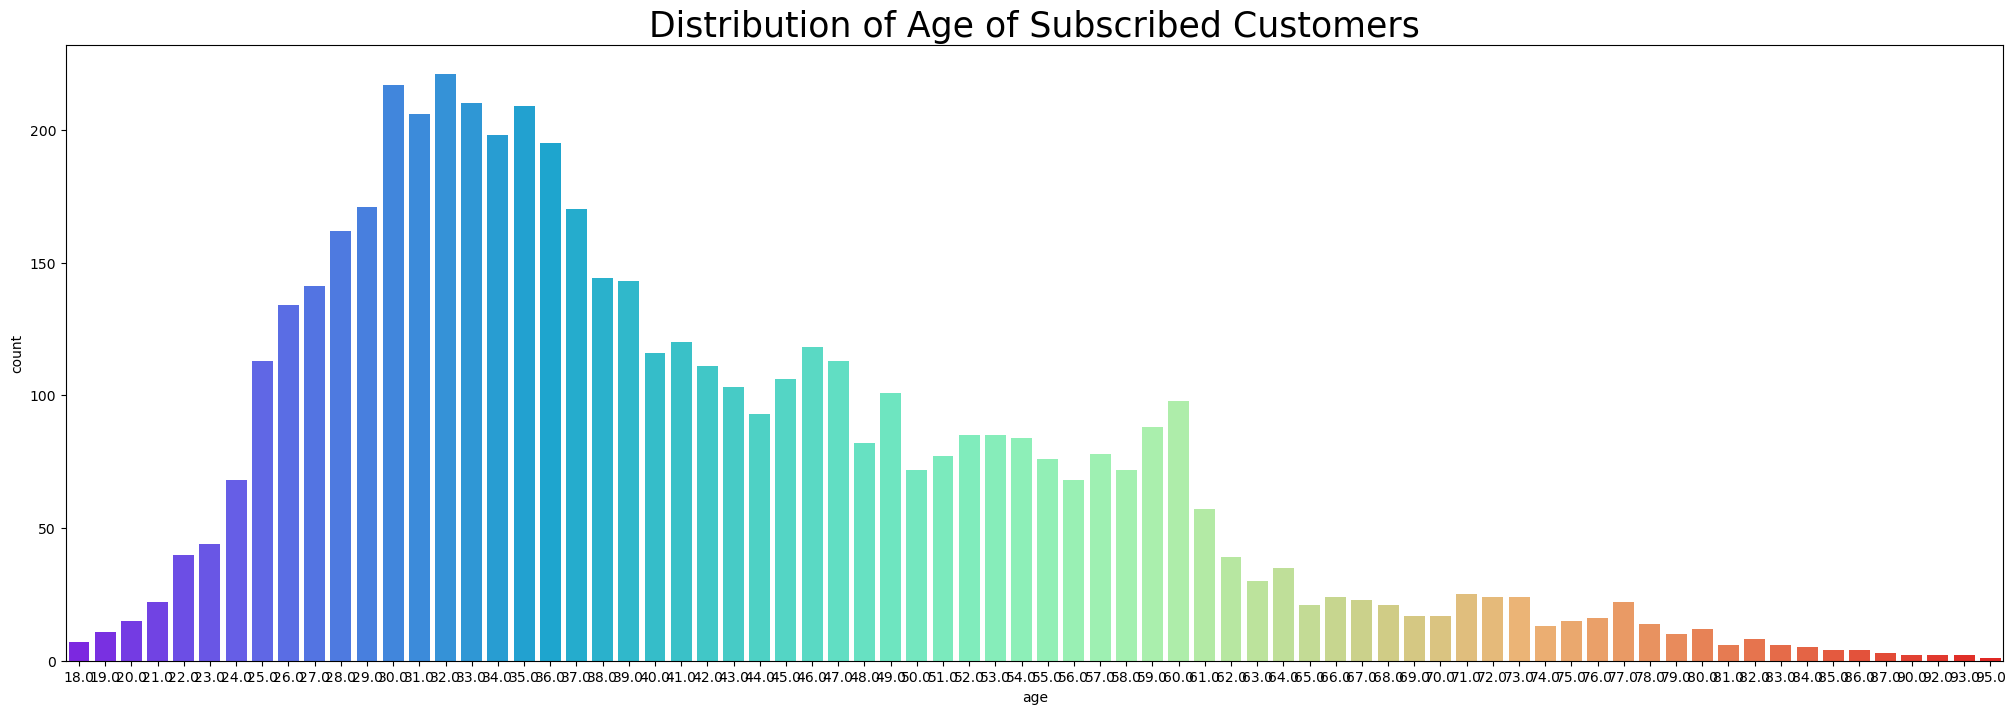

In [24]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(df_subscribed['age'], palette = 'rainbow')
plt.title('Distribution of Age of Subscribed Customers', fontsize = 25)
plt.show()

# Distribution of Balance

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


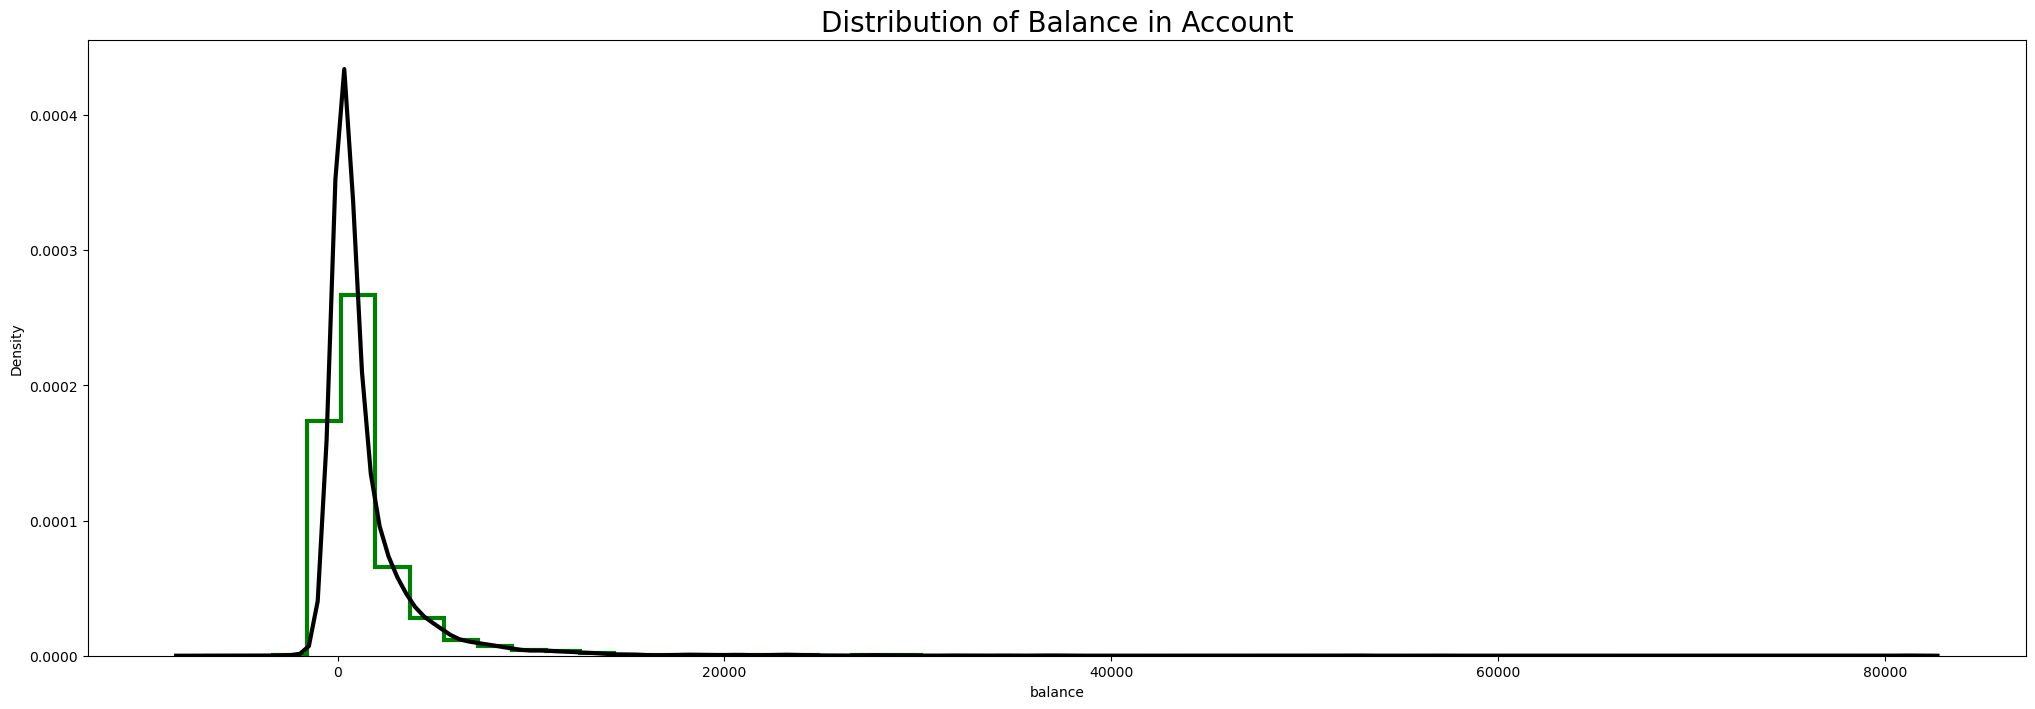

In [25]:
sns.distplot(df['balance'], hist=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, kde=True,bins=50,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
plt.title('Distribution of Balance in Account', fontsize = 20)
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


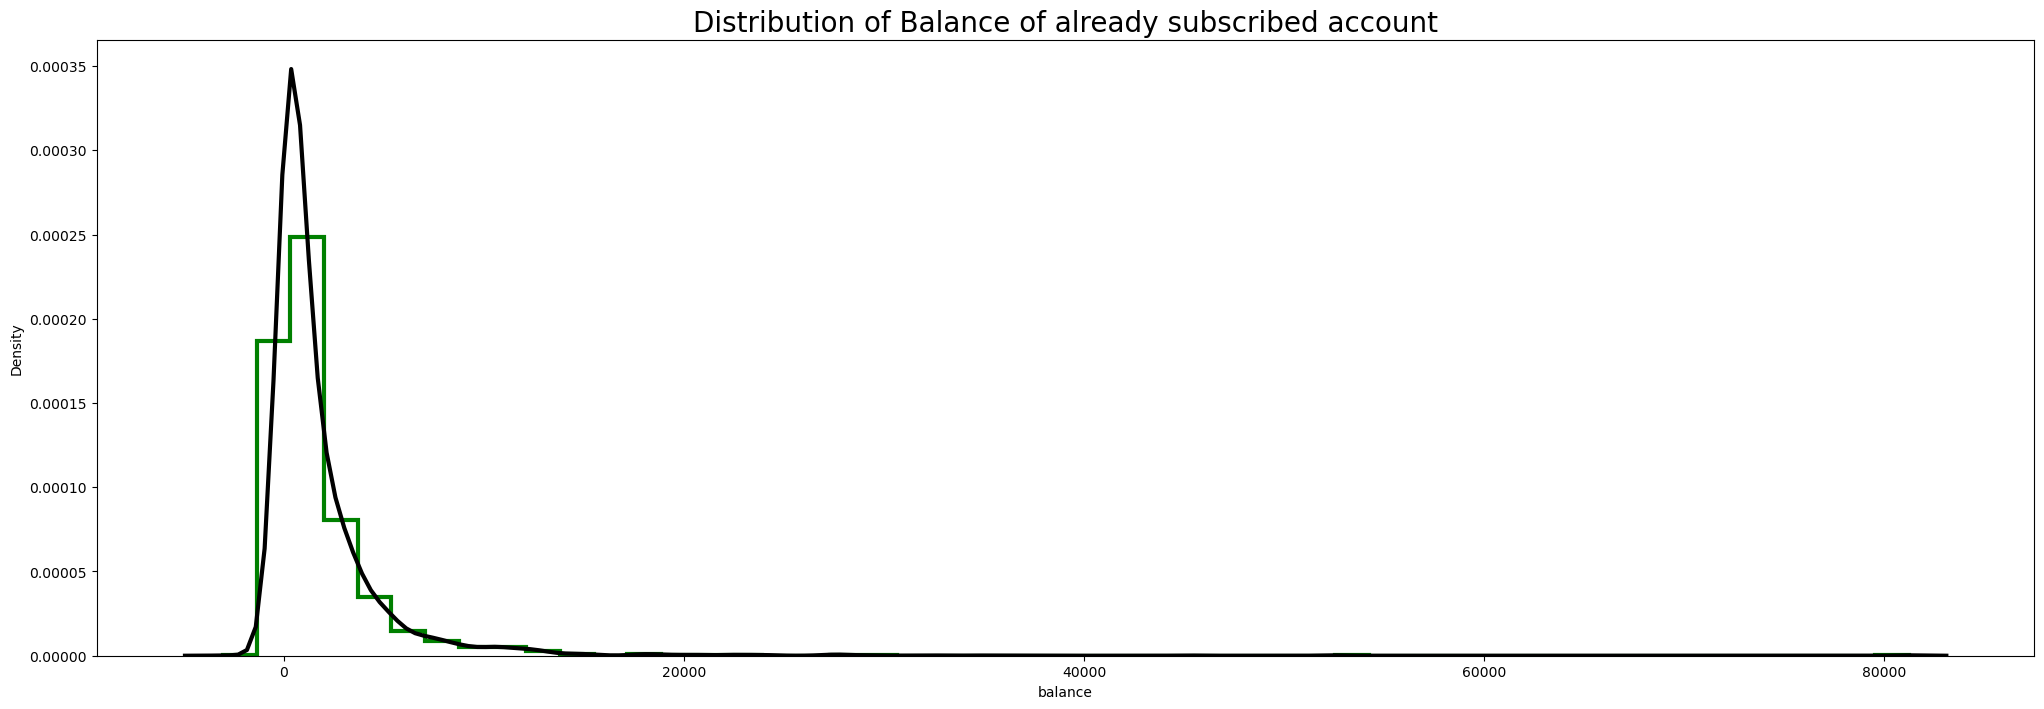

In [26]:
sns.distplot(df_subscribed['balance'], hist=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, kde=True,bins=50,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
plt.title('Distribution of Balance of already subscribed account', fontsize = 20)
plt.show()

# Distribution of duration

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


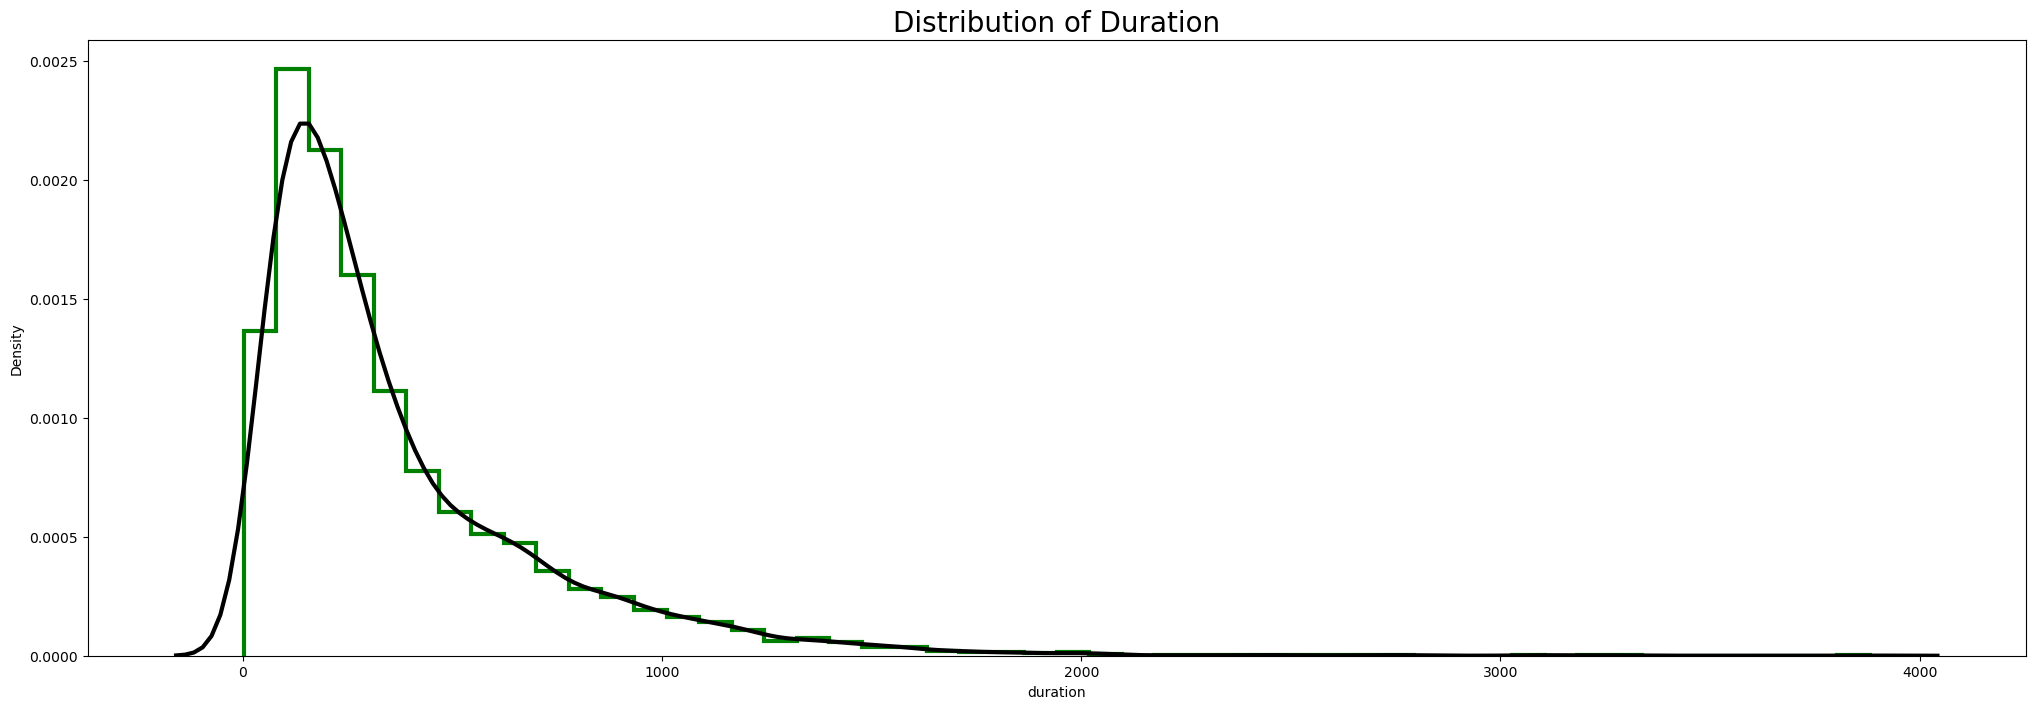

In [27]:
sns.distplot(df['duration'], hist=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, kde=True,bins=50,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
plt.title('Distribution of Duration', fontsize = 20)
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


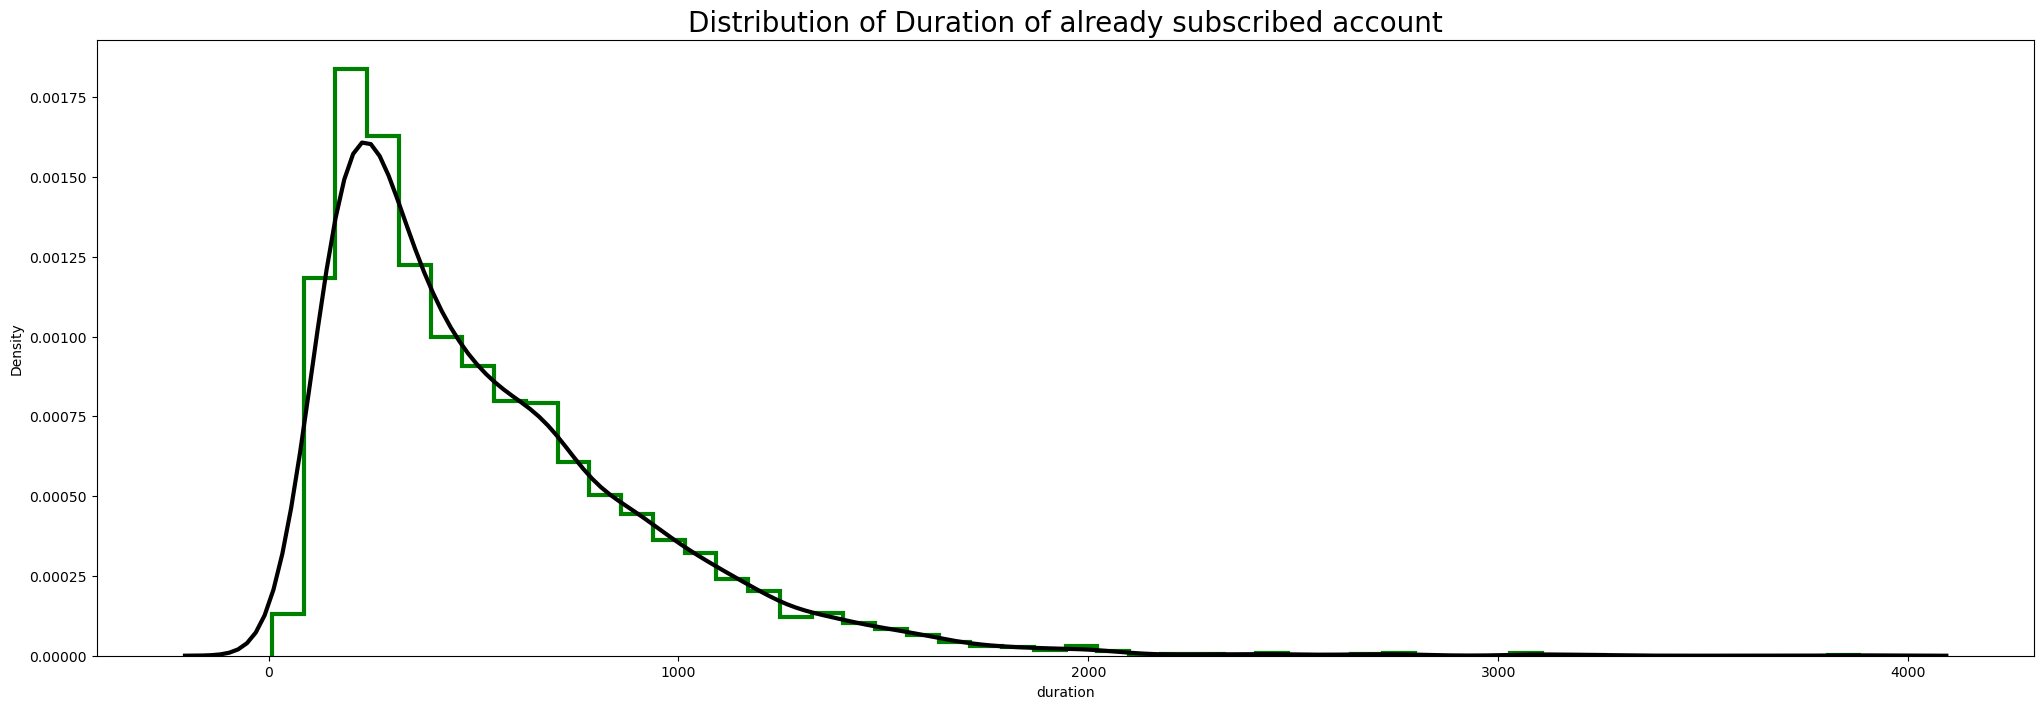

In [28]:
sns.distplot(df_subscribed['duration'], hist=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"}, kde=True,bins=50,hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})
plt.title('Distribution of Duration of already subscribed account', fontsize = 20)
plt.show()

In [29]:
labels = ['Normal', 'Default']
size = df['default'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

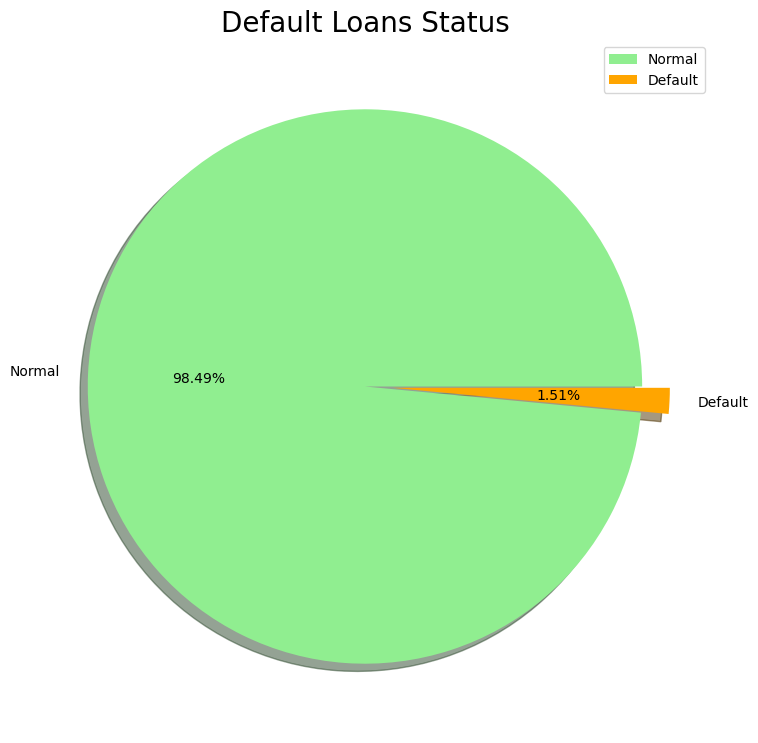

In [30]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Default Loans Status', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [31]:
labels = ['No Housing Loan','Housing loan taken' ]
size = df['housing'].value_counts()
colors = ['blue', 'yellow']
explode = [0, 0.1]

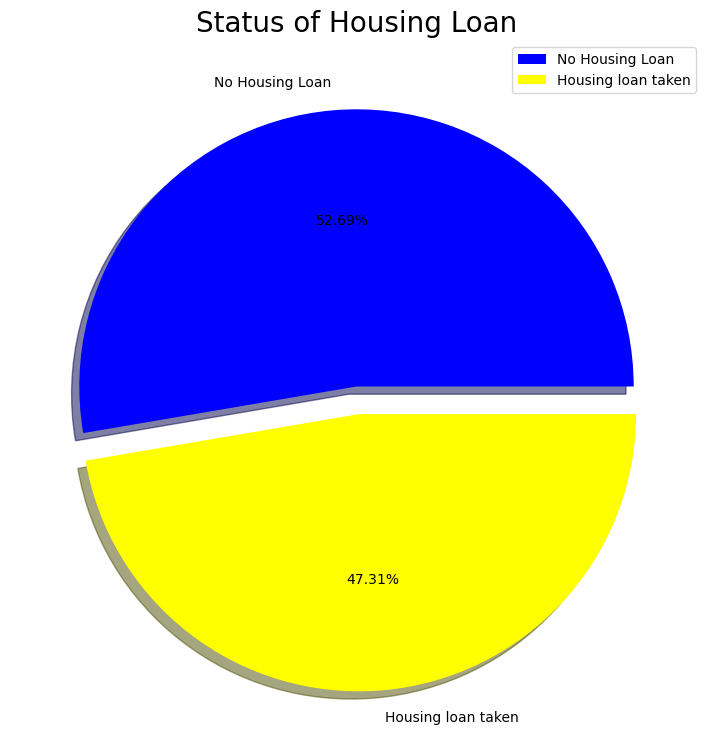

In [32]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Housing Loan', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [33]:
labels = ['No Loan Taken','Has Taken Loan']
size = df['loan'].value_counts()
colors = ['green', 'blue']
explode = [0, 0.1]

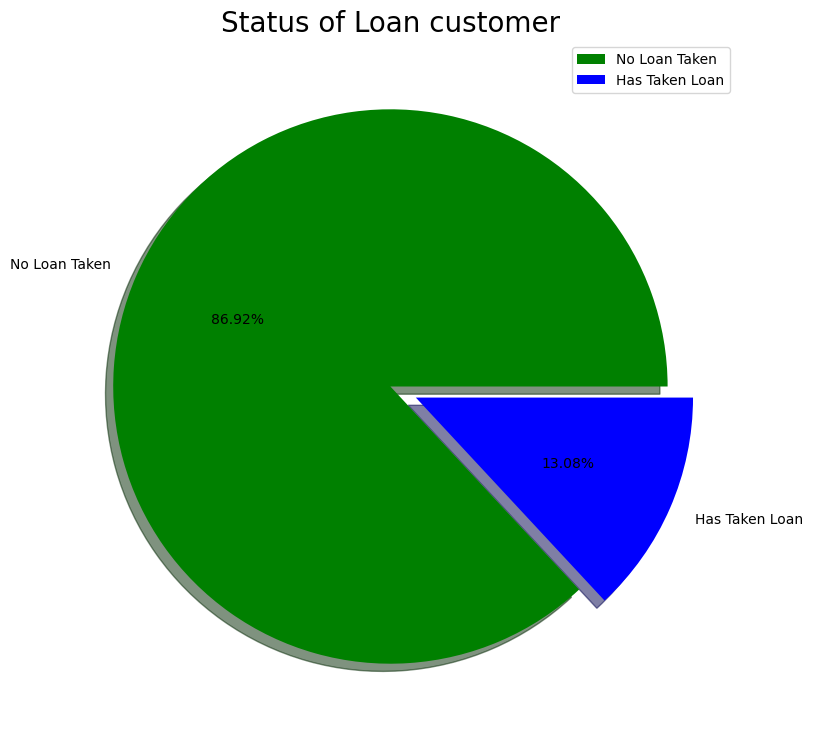

In [34]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Loan customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


In [35]:
labels = ['No deposit','Deposit in Bank']
size = df['deposit'].value_counts()
colors = ['blue', 'orange']
explode = [0, 0.1]

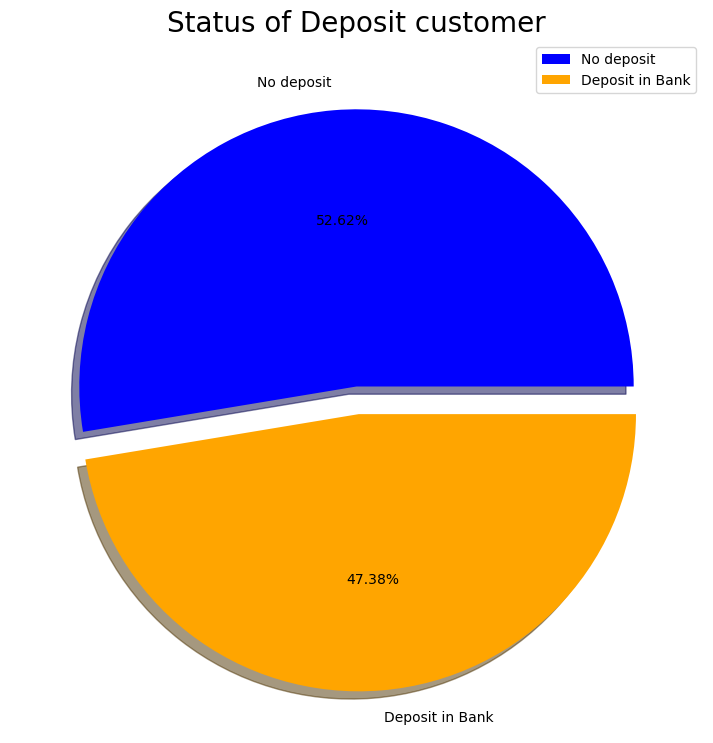

In [36]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Deposit customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


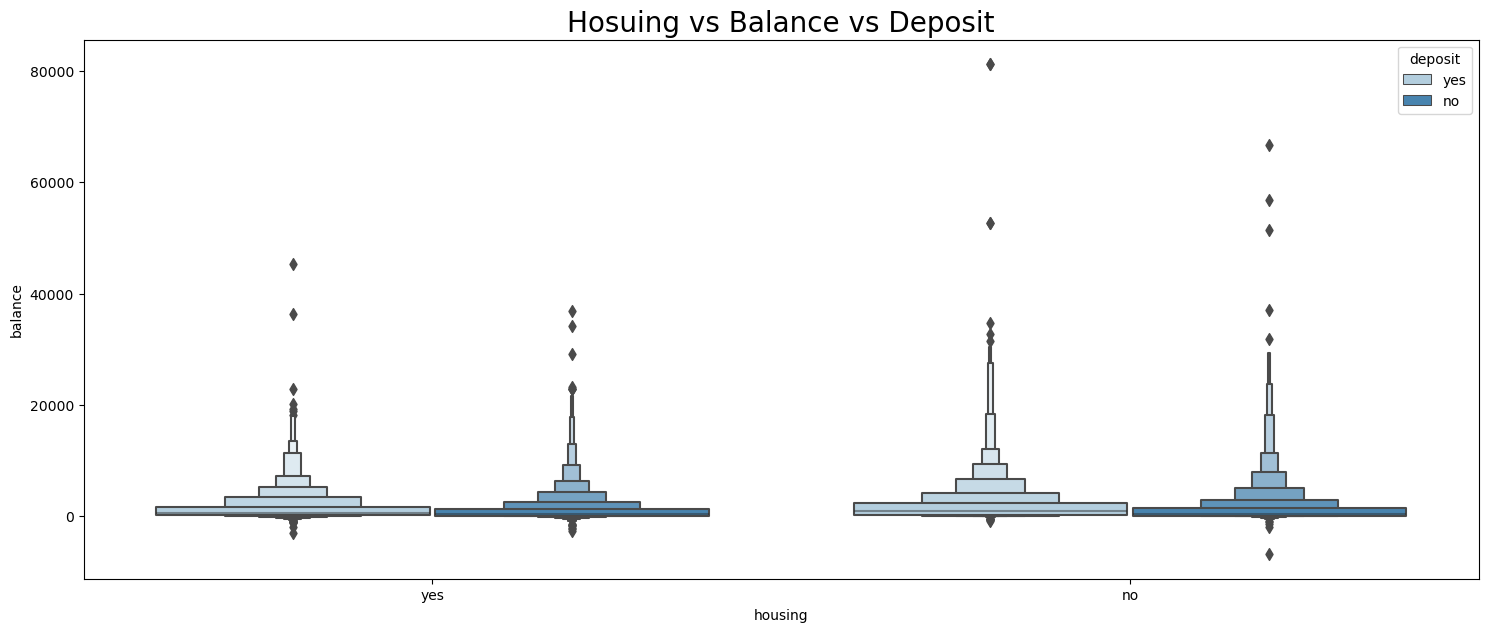

In [37]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['housing'], df['balance'],hue=df['deposit'], palette = 'Blues')
plt.title('Hosuing vs Balance vs Deposit', fontsize = 20)
plt.show()


C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


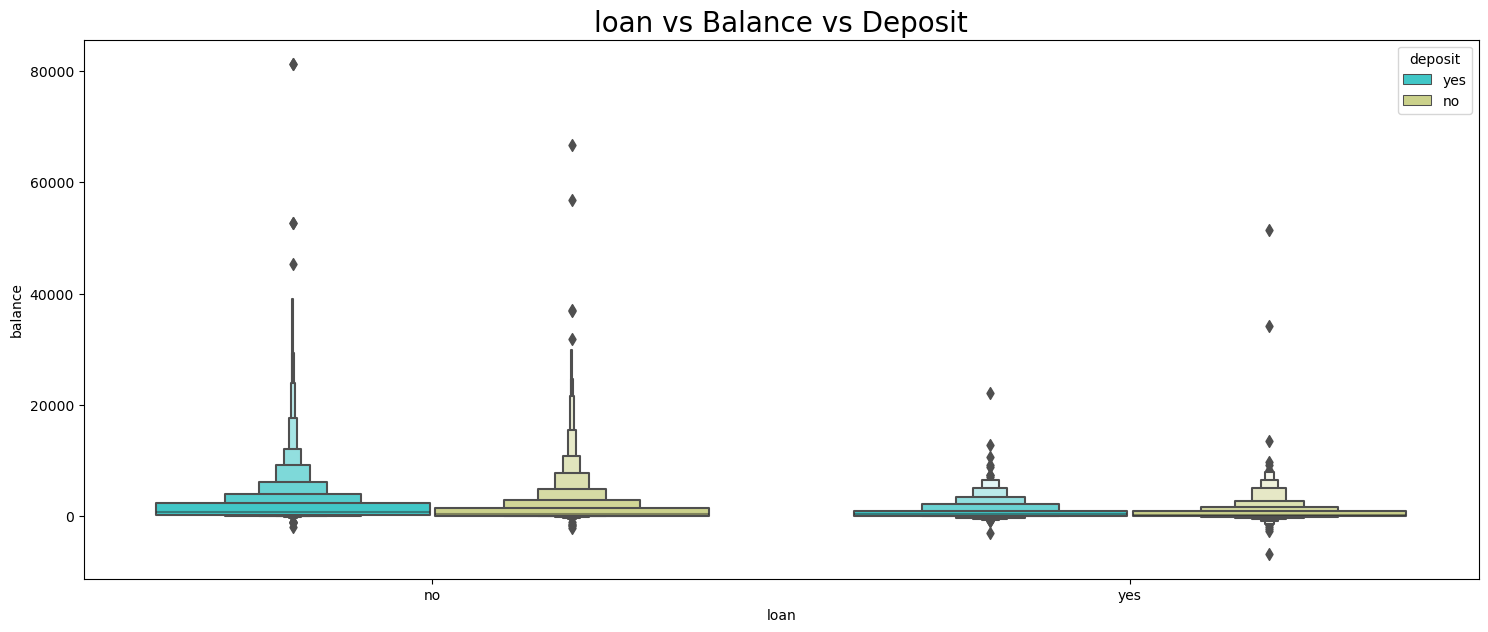

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['loan'], df['balance'],hue=df['deposit'], palette = 'rainbow')
plt.title('loan vs Balance vs Deposit', fontsize = 20)
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


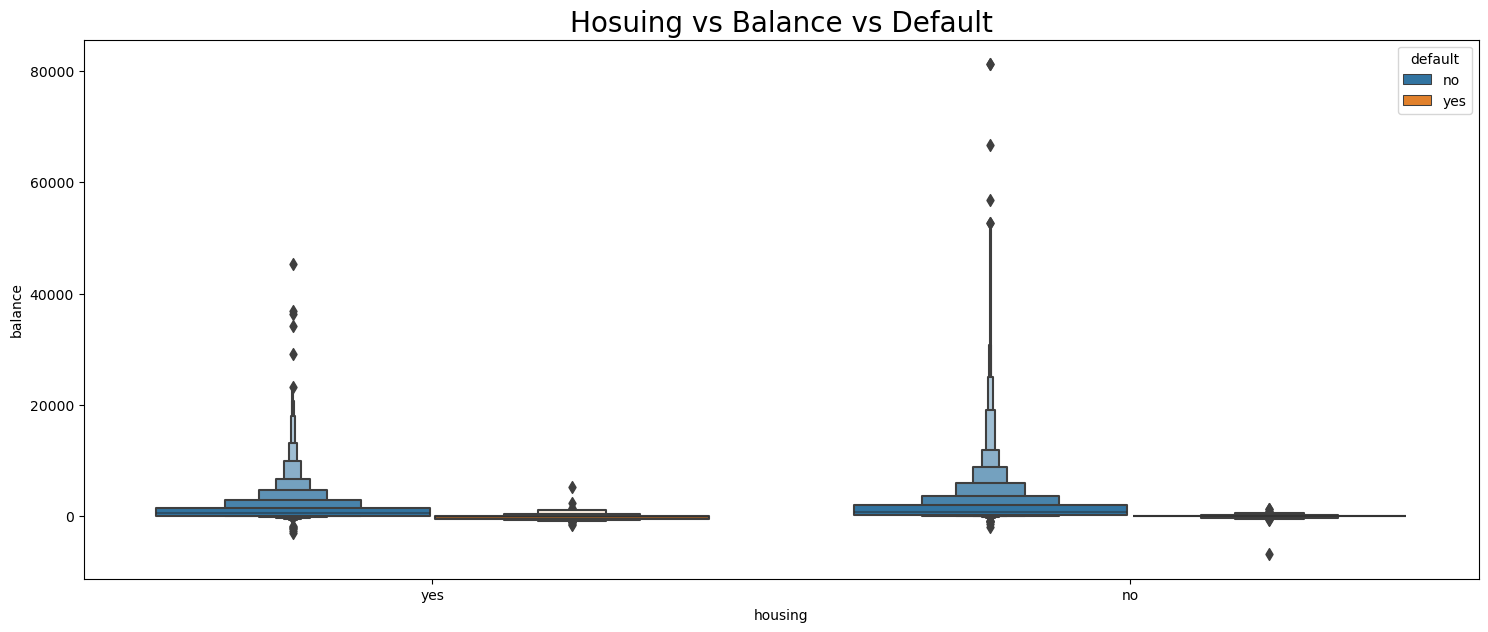

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['housing'], df['balance'],hue=df['default'])
plt.title('Hosuing vs Balance vs Default', fontsize = 20)
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


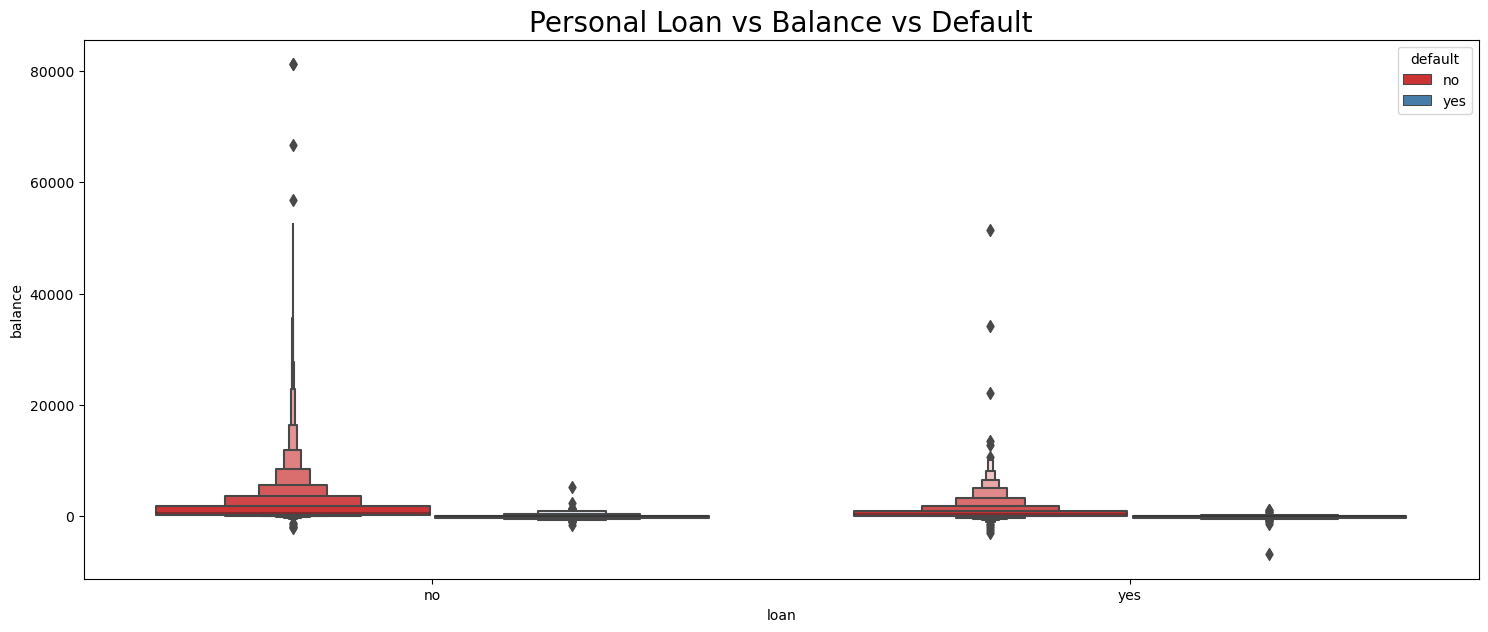

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['loan'], df['balance'],hue=df['default'],palette="Set1")
plt.title('Personal Loan vs Balance vs Default', fontsize = 20)
plt.show()

# # Sort the dataframe by target

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gdmis\anaconda3\lib\site-pack

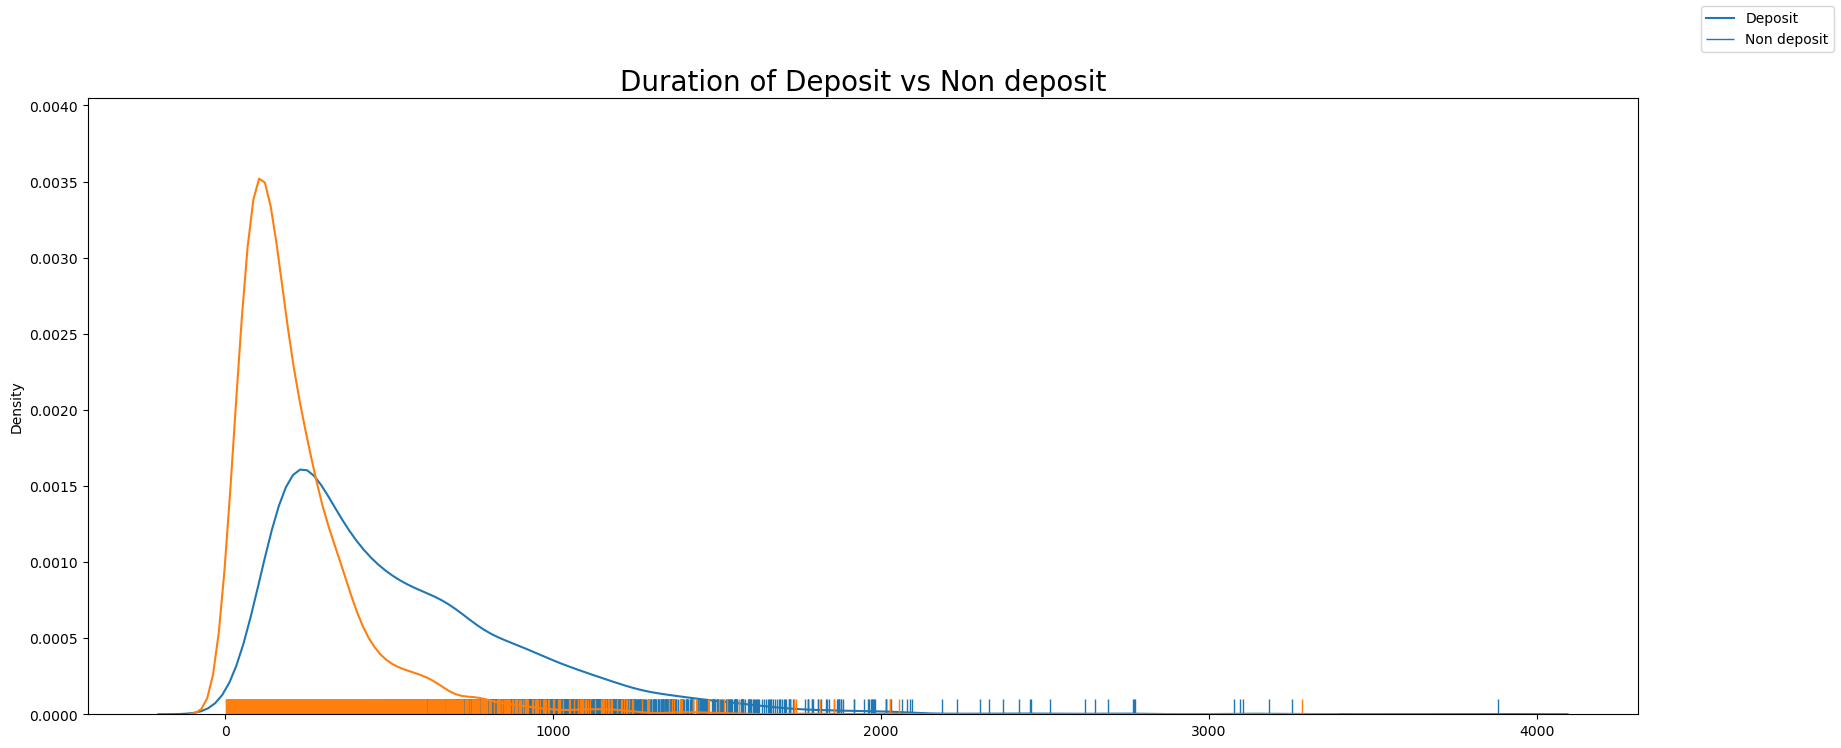

In [41]:
deposit_yes = df.loc[df['deposit'] == 'yes']
deposit_no = df.loc[df['deposit'] == 'no']
fig = plt.figure(figsize=(20,8))
sns.distplot(deposit_yes[['duration']], hist=False, rug=True)
sns.distplot(deposit_no[['duration']], hist=False, rug=True)
plt.title('Duration of Deposit vs Non deposit', fontsize = 20)
fig.legend(labels=['Deposit','Non deposit'])
plt.show()

C:\Users\gdmis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

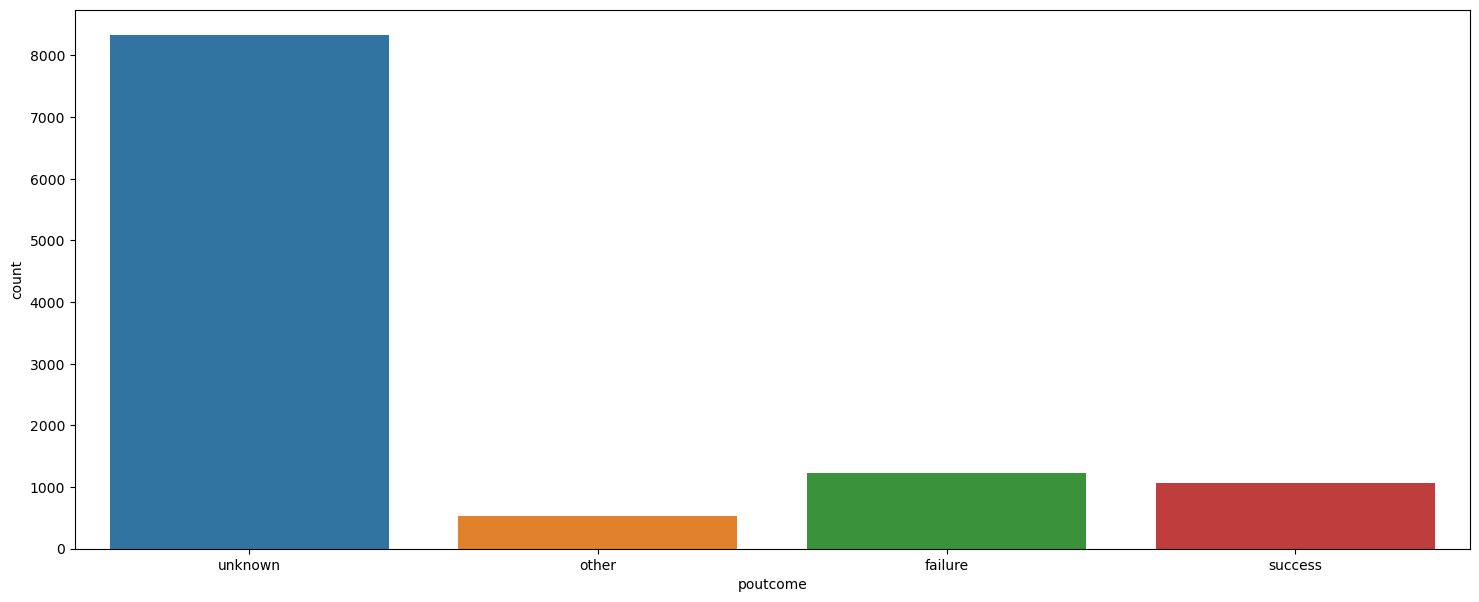

In [42]:
sns.countplot(df['poutcome'])

In [44]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)

Text(0, 0.5, 'Count')

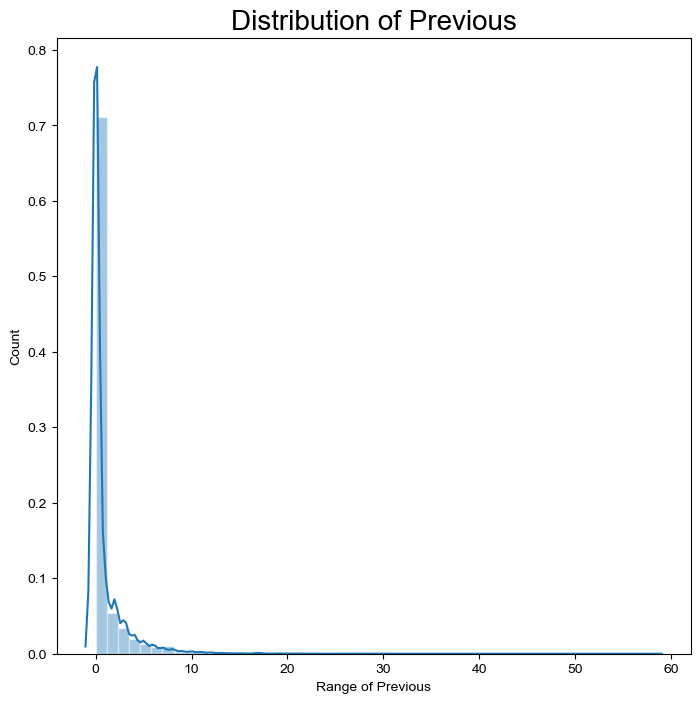

In [45]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['previous'])
plt.title('Distribution of Previous', fontsize = 20)
plt.xlabel('Range of Previous')
plt.ylabel('Count')

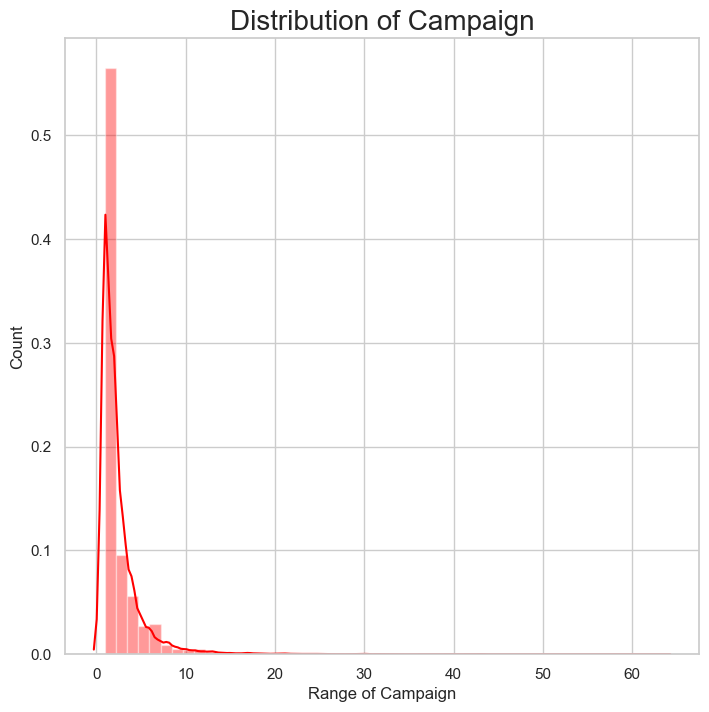

In [46]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['campaign'], color = 'red')
plt.title('Distribution of Campaign', fontsize = 20)
plt.xlabel('Range of Campaign')
plt.ylabel('Count')
plt.show()

In [47]:
df["deposit"] = df.deposit.apply(lambda  x:1 if x=="yes" else 0)
df["loan"] = df.loan.apply(lambda  x:1 if x=="yes" else 0)
df["housing"] = df.housing.apply(lambda  x:1 if x=="yes" else 0)
df["default"] = df.default.apply(lambda  x:1 if x=="yes" else 0)


# Correlation Analysis

<AxesSubplot:>

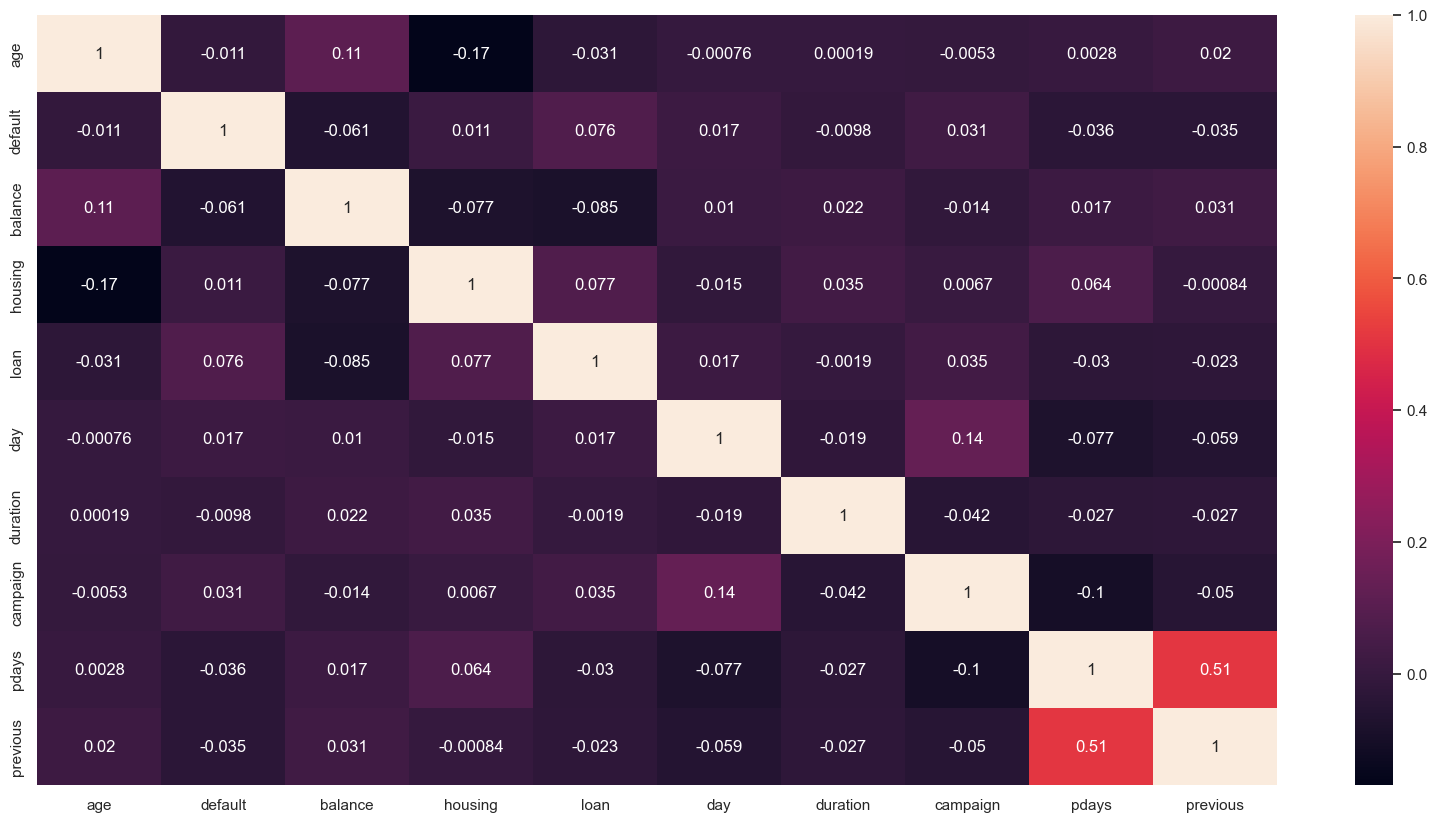

In [48]:
df1=df.drop(['deposit'],axis=1)

plt.figure(figsize=(20,10)) 
sns.heatmap(df1.corr(), annot=True)

# Correlation with target Variable

<AxesSubplot:title={'center':'Correlation with Deposit'}>

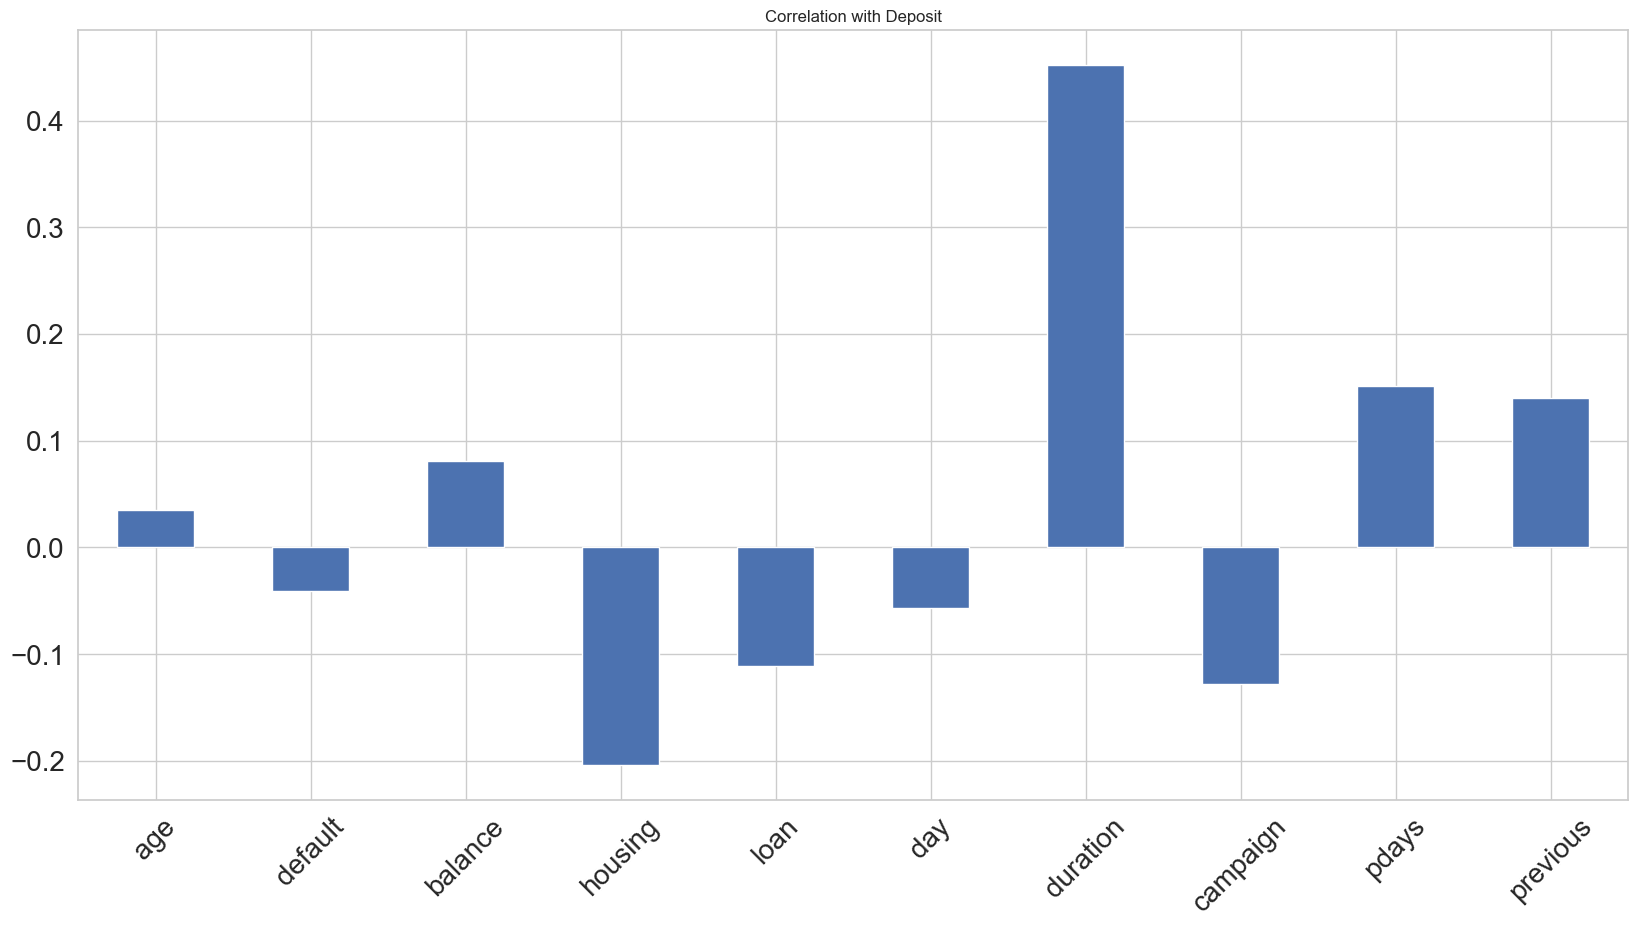

In [49]:
df1.corrwith(df.deposit).plot.bar(
        figsize = (20, 10), title = "Correlation with Deposit", fontsize = 20,
        rot = 45, grid = True)

# Segregation of features & target variable

In [51]:
# Feature 
X = df.drop(['deposit'],axis=1)

 # Target variable
y=df['deposit']

# Splitting of training & testing split

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20, random_state=0)

# convert categorical columns to integers

In [53]:
category_cols = ['job','marital','education','contact','month','poutcome']
for header in category_cols:
    X_train[header] = X_train[header].astype('category').cat.codes
    X_test[header] = X_test[header].astype('category').cat.codes

In [54]:
print(X_train.dtypes)

age          int64
job           int8
marital       int8
education     int8
default      int64
balance      int64
housing      int64
loan         int64
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
dtype: object


# Model Building

In [ ]:
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test))

In [ ]:
y_predict = model.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

results = pd.DataFrame([['CatBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results


# Cross Validation

In [ ]:
from catboost import cv,Pool
cv_data = cv(Pool(X,y,cat_features=categorical_features_indices),model.get_params(),fold_count=10)

print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']), 
    cv_data['test-Accuracy-std'][cv_data['test-Accuracy-mean'].idxmax(axis=0)],
    cv_data['test-Accuracy-mean'].idxmax(axis=0)
))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [ ]:
from sklearn import metrics
plt.figure()

In [ ]:
# Add the models to the list that you want to view on the ROC plot
models = [
    {
    'label': 'CATBOOST',
    'model': CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42),        
    }
]

In [ ]:
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test)) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model explainability


In [ ]:
features ='duration'
res =model.get_feature_statistics(X_train, y_train,features, plot=True)

In [ ]:
features ='balance'
res =model.get_feature_statistics(X_train, y_train,features, plot=True)

In [ ]:
import shap
shap_values = model.get_feature_importance(Pool(X_test, label=y_test,cat_features=categorical_features_indices), 
                                                                     type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[3,:], X_test.iloc[3,:])

# Importance Feature 

In [ ]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

In [ ]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='b')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()